In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# grab wine quality data
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. "Wine Quality," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C56S3T.
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

# use white wine data only
wine = white_wine[:]
X = wine.drop(['quality'], axis=1)
y = wine['quality']
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
# make y_train a 1d numpy array
y_train = y_train.to_numpy().ravel()

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rms = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rms:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.3520
Root Mean Squared Error: 0.5933
R-squared Score: 0.5468


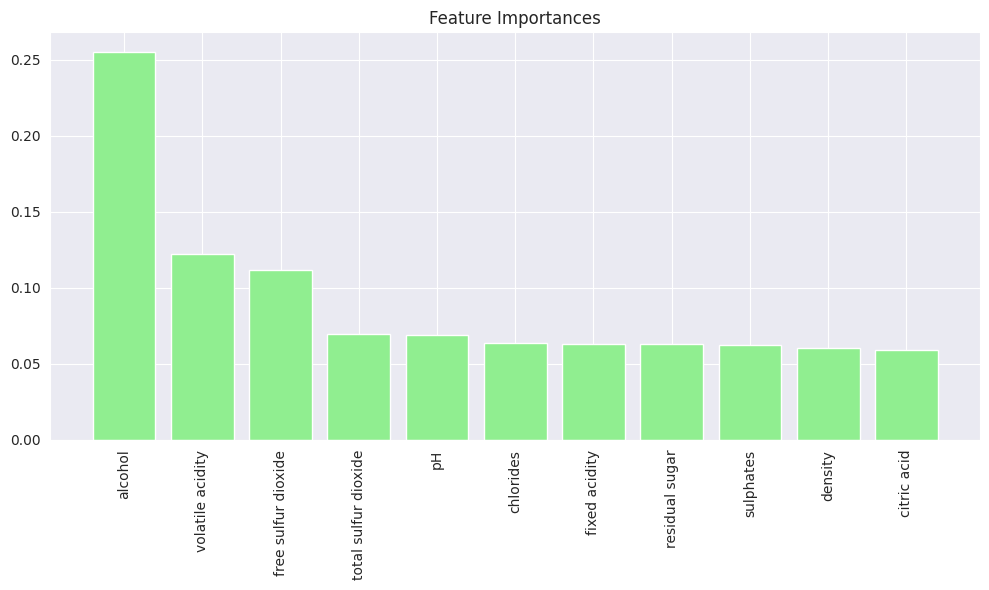

In [20]:
# plot feature importances
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='lightgreen', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [6]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'log2', 'sqrt']
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_rf_reg = grid_search.best_estimator_

y_pred_tuned = best_rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_tuned)
rms = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rms:.4f}")
print(f"R-squared Score: {r2:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.3473
Root Mean Squared Error: 0.5893
R-squared Score: 0.5576


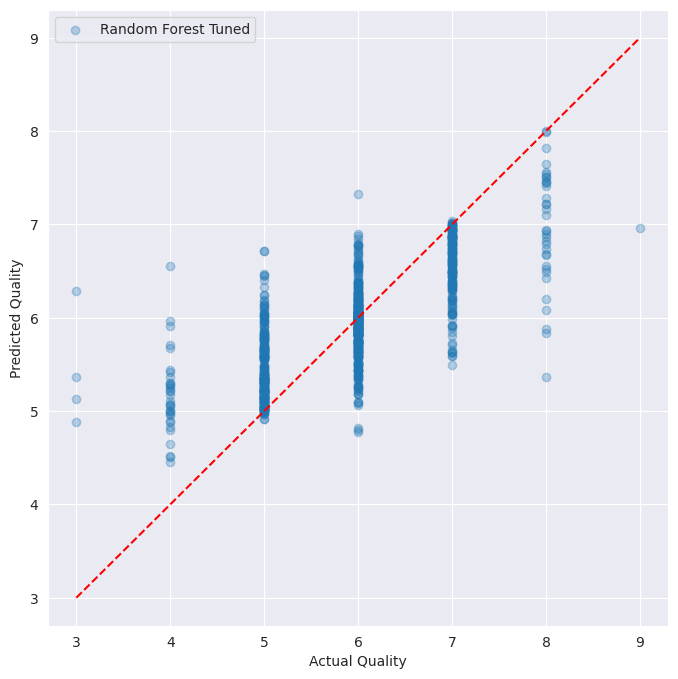

In [7]:
plt.show()
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tuned, alpha=0.3, label='Random Forest Tuned')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.show()

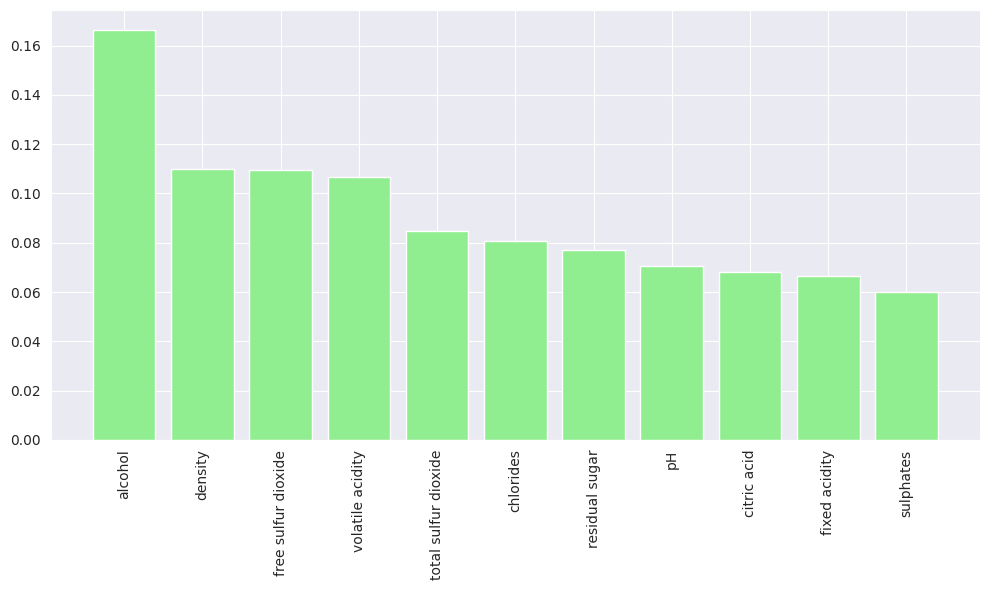

In [8]:
# plot feature importances

importances = best_rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color='lightgreen', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# try gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr)
rms = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rms:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.4580
Root Mean Squared Error: 0.6768
R-squared Score: 0.4166


In [10]:
# hyperparameter tuning
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(),
                               param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search_gbr.fit(X_train, y_train)

print(f"Best parameters: {grid_search_gbr.best_params_}")

best_gbr = grid_search_gbr.best_estimator_

y_pred_gbr_tuned = best_gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr_tuned)
rms = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr_tuned)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rms:.4f}")
print(f"R-squared Score: {r2:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.3480
Root Mean Squared Error: 0.5899
R-squared Score: 0.5567


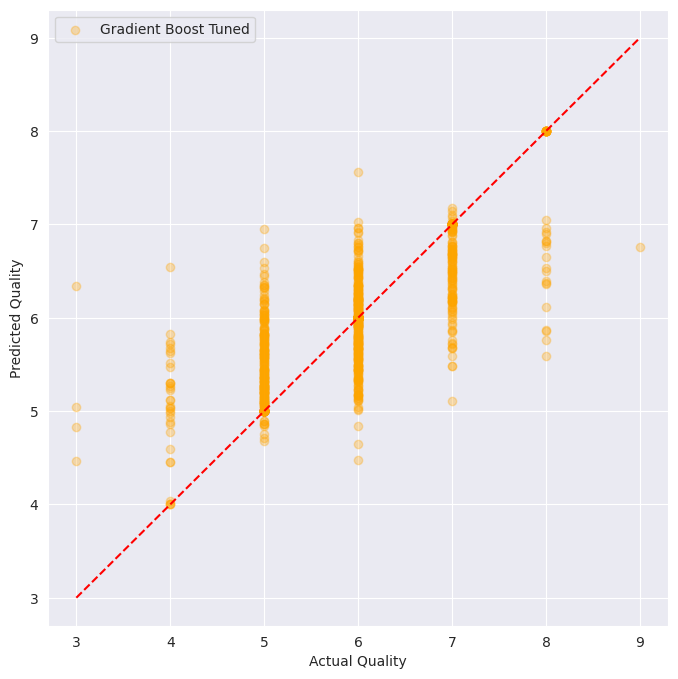

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_gbr_tuned, alpha=0.3, color='orange', label='Gradient Boost Tuned')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.show()

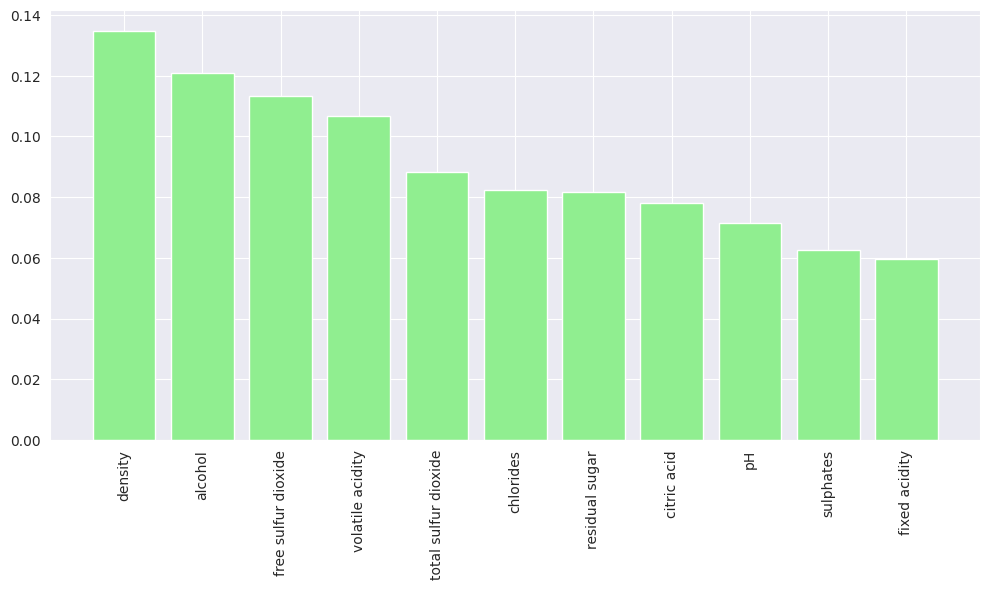

In [12]:
# plot feature importances

importances = best_gbr.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color='lightgreen', align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

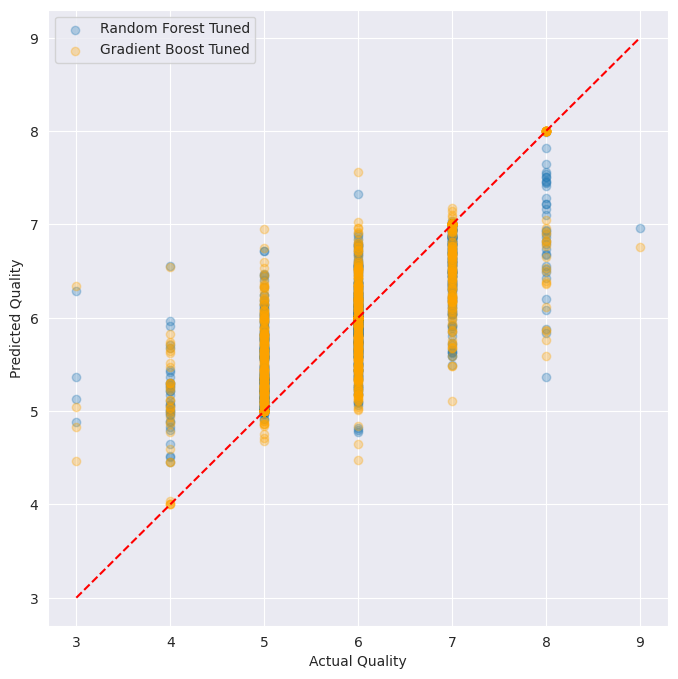

In [13]:
plt.show()
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tuned, alpha=0.3, label='Random Forest Tuned')
plt.scatter(y_test, y_pred_gbr_tuned, alpha=0.3, color='orange', label='Gradient Boost Tuned')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.legend()
plt.show()